## Name - Vaibhav R. Gudulkar 

# Assignment - SVM (salarydata.csv)


In [2]:
# importing required libraries

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
salary_train = pd.read_csv('SalaryData_Train.csv')
salary_test = pd.read_csv('SalaryData_Test.csv')

salary_train.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30145,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
25832,36,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7298,0,40,United-States,>50K
16873,31,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
30019,35,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
8624,46,Private,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,30,United-States,<=50K


In [7]:
salary_test.sample(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
5298,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,<=50K
2094,37,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,2002,40,United-States,<=50K
8855,41,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K
13086,41,Private,Bachelors,13,Divorced,Transport-moving,Not-in-family,White,Male,0,0,48,United-States,<=50K
2470,28,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,35,United-States,<=50K


In [8]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='Salary', ylabel='count'>

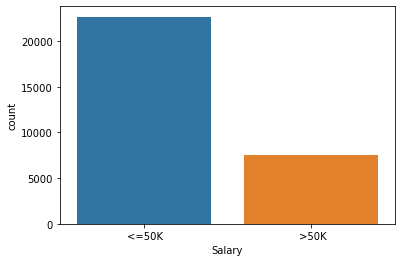

In [11]:
# Visualisation

import seaborn as sns
sns.countplot(x=salary_train['Salary'])

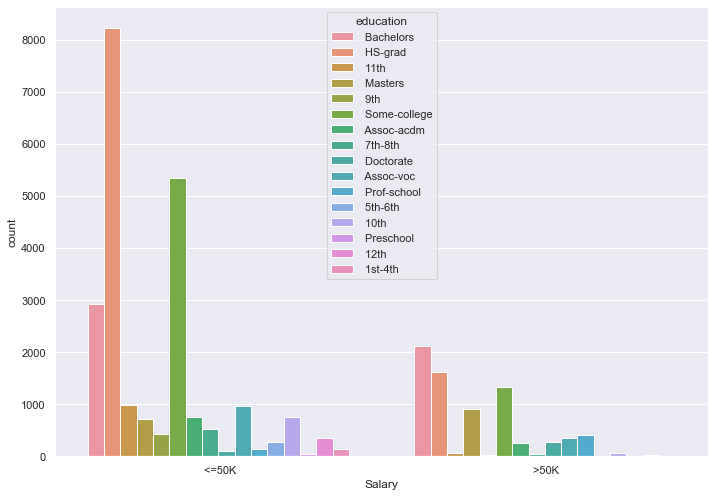

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #set figure size
sns.countplot(x=salary_train['Salary'], hue=salary_train['education']);

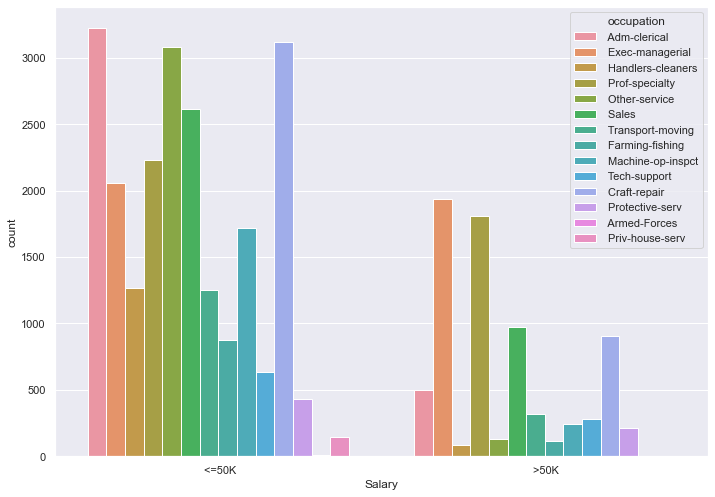

In [17]:
from matplotlib import rcParams #alternate way to set figure size

rcParams['figure.figsize']= 11.7,8.27
sns.countplot(x=salary_train['Salary'], hue=salary_train['occupation']);

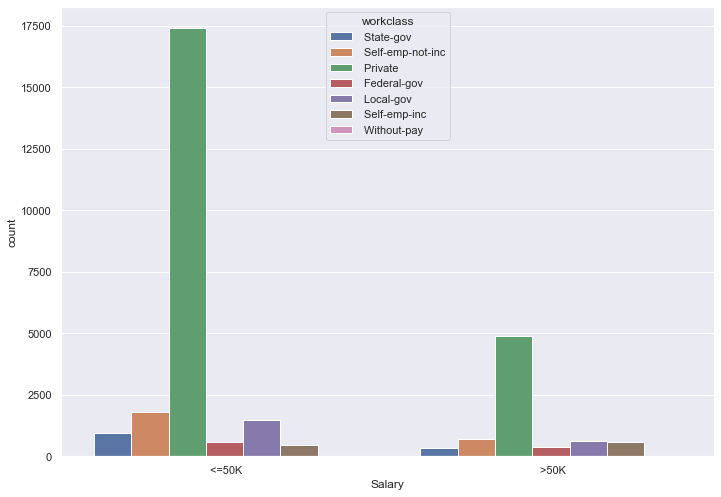

In [18]:
sns.countplot(x=salary_train['Salary'], hue=salary_train['workclass']);

<AxesSubplot:xlabel='Salary', ylabel='count'>

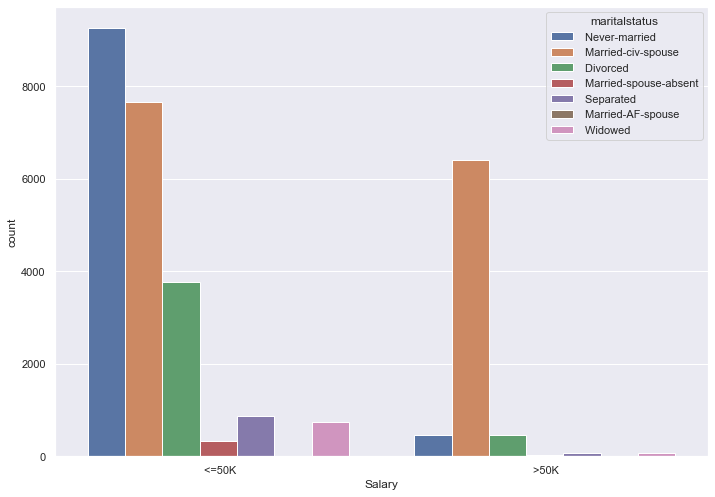

In [19]:
sns.countplot(x=salary_train['Salary'], hue=salary_train['maritalstatus'])

In [20]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_train =LabelEncoder()

salary_train['Salary']= LabelEncoder_train.fit_transform(salary_train['Salary'])
salary_test['Salary']= LabelEncoder_train.fit_transform(salary_test['Salary'])

df_train = pd.get_dummies(salary_train)


df_test = pd.get_dummies(salary_test)

In [21]:
df_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


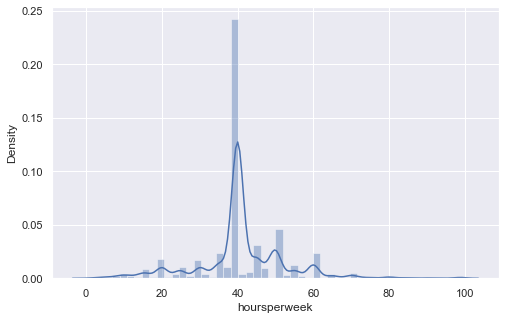

In [23]:
rcParams['figure.figsize']= 8,5

sns.distplot(df_train['hoursperweek']);

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


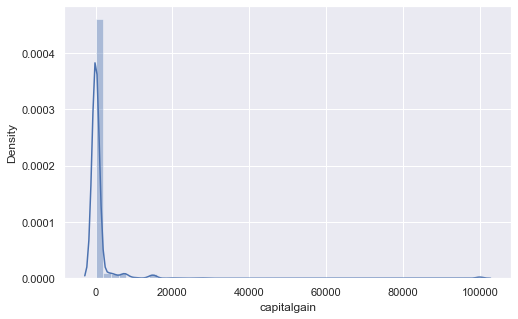

In [24]:
rcParams['figure.figsize']= 8,5

sns.distplot(df_train['capitalgain'])


C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

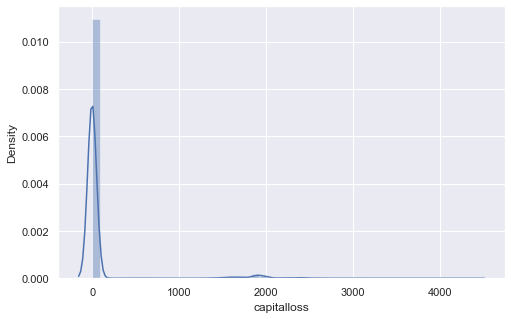

In [25]:
sns.distplot(df_train['capitalloss'])

In [32]:
x_train = df_train.drop('Salary', axis=1)
y_train = df_train['Salary']

In [33]:
x_test = df_test.drop('Salary', axis=1)
y_test = df_test['Salary']

In [34]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [35]:
y_pred = clf.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.7964143426294821


### The Accuracy is 80%

In [38]:
print(confusion_matrix(y_test, y_pred))

[[10997   363]
 [ 2703   997]]
